<a href="https://colab.research.google.com/github/abia200304/IIIT-Hyderabad-Research_works/blob/main/ConvLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -o /content/archive.zip

Archive:  /content/archive.zip
  inflating: Traffic.csv             
  inflating: TrafficTwoMonth.csv     


In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from sklearn.model_selection import  train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf

file_path='/content/TrafficTwoMonth.csv'
df=pd.read_csv(file_path)
display(df)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [ ]:
column_3_data = df.iloc[:, 3]
column_4_data = df.iloc[:, 4]
column_5_data = df.iloc[:, 5]
column_6_data = df.iloc[:, 6]


In [ ]:
coloumn_3_data=np.array(column_3_data)
coloumn_4_data=np.array(column_4_data)
coloumn_5_data=np.array(column_5_data)
coloumn_6_data=np.array(column_6_data)


In [ ]:
column3_data=coloumn_3_data.reshape(-1,1)
column4_data =coloumn_4_data.reshape(-1,1)
column5_data=coloumn_5_data.reshape(-1,1)
column6_data=coloumn_6_data.reshape(-1,1)

In [ ]:
data = np.concatenate([ column3_data,column4_data,column5_data,column6_data],axis =1)

In [ ]:
scalar=MinMaxScaler((0,1))
scaled_data=scalar.fit_transform(data)

In [ ]:
scaled_data.shape

(5952, 4)

In [ ]:
def create_dataset(dataset, time_step):
    X, Y = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, :])
    return np.array(X), np.array(Y)
time_step = 15
X, Y= create_dataset(scaled_data, time_step)
print(X.shape)
print(Y.shape)

(5937, 15, 4)
(5937, 4)


In [ ]:
X_train=X[:int(0.8*len(X))]
y_train = Y[:int(0.8*len(Y))].reshape(-1,4)
X_test = X[int(0.8*len(X)):]
y_test = Y[int(0.8*len(Y)):].reshape(-1,4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4749, 15, 4)
(4749, 4)
(1188, 15, 4)
(1188, 4)


In [ ]:
from keras.layers import Conv1D,LSTM,Dense,Input
from keras.models import Model
from keras import regularizers
input_layer = Input(shape=( 15,4))

conv1_layer = Conv1D(filters=24, kernel_size=2, activation='relu',kernel_regularizer=regularizers.l1(0.1))(input_layer)
lstm_layer = LSTM(20,activation='relu')(conv1_layer)
x = Dense(4,activation='sigmoid')(lstm_layer)
model = Model(inputs=input_layer, outputs=x)
model.compile(loss='mae', optimizer='adam')
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 15, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 14, 24)         │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 20)             │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │            84 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,900 (15.23 KB)

 Trainable params: 3,900 (15.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(X_train,y_train,validation_split=0.15,epochs=50,verbose=1)

Epoch 1/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 2.9677 - val_loss: 1.4635
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.0926 - val_loss: 0.3707
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2561 - val_loss: 0.1820
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1631 - val_loss: 0.1756
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1535 - val_loss: 0.2010
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1501 - val_loss: 0.1531
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1415 - val_loss: 0.1573
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1386 - val_loss: 0.1508
Epoch 9/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1303 - val_loss: 0.1538
Epoch 10/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1364 - val_loss: 0.1468
Epoch 11/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1327 - val_loss: 0.1791
Epoch 12/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/s

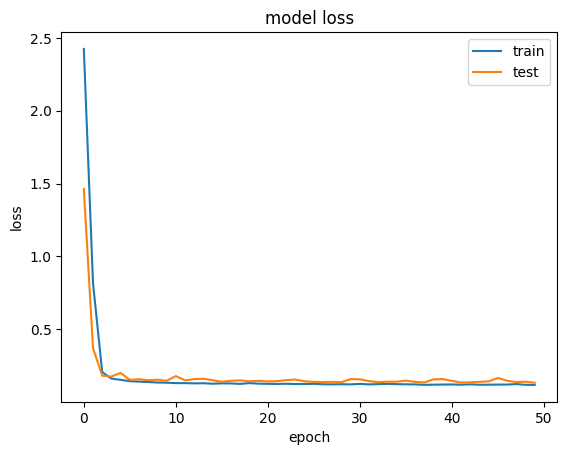

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
y_pred=model.predict(X_test)
test_predict=model.predict(X_test)
print(test_predict.shape)
predictions_original_scale = scalar.inverse_transform(test_predict)
y_test_original_scale = scalar.inverse_transform(y_test)
mae=mean_absolute_error(predictions_original_scale,y_test_original_scale,)
mse=np.sqrt(mean_squared_error(predictions_original_scale,y_test_original_scale,))
mape=mean_absolute_percentage_error(predictions_original_scale,y_test_original_scale,)
rmse=np.sqrt(mse)
print(rmse)
print(mse)
print(mae)
print(mape)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
(1188, 4)
4.088919371138664
16.71926162367301
10.398759058554365
0.5625135644254132


In [ ]:
print(predictions_original_scale)
print(y_test_original_scale)

[[95.22177   14.7044935 15.600343  13.259704 ]
 [90.28127   13.854045  14.803259  14.196309 ]
 [91.86208   14.281816  15.335997  13.978957 ]
 ...
 [26.952707   3.928478   4.3455467 28.12672  ]
 [21.781702   3.0655656  3.3492525 29.580215 ]
 [17.84236    2.4066362  2.5976658 31.03553  ]]
[[45. 24. 31. 11.]
 [80. 26. 35.  6.]
 [83. 18.  6. 15.]
 ...
 [15.  4.  1. 25.]
 [16.  5.  0. 27.]
 [14.  3.  1. 15.]]


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


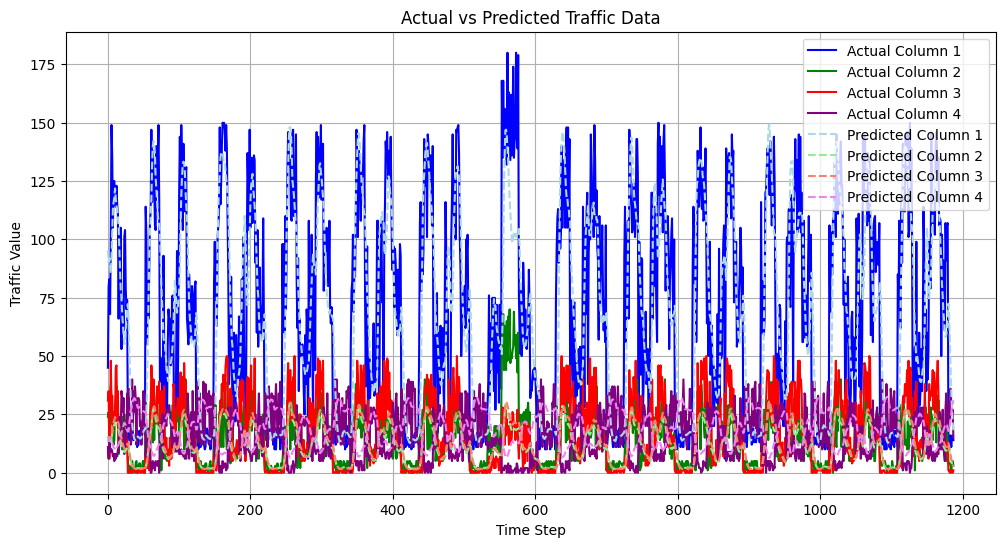

In [ ]:


import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

# Inverse transform the scaled data back to original scale
y_test_actual = scalar.inverse_transform(y_test)
y_pred_actual = scalar.inverse_transform(y_pred)

# Plotting
plt.figure(figsize=(12, 6))

# Plot actual data for each column
plt.plot(y_test_actual[:, 0], label='Actual Column 1',color='blue')
plt.plot(y_test_actual[:, 1], label='Actual Column 2',color='green')
plt.plot(y_test_actual[:, 2], label='Actual Column 3', color='red')
plt.plot(y_test_actual[:, 3], label='Actual Column 4', color='purple')

# Plot predicted data for each column
plt.plot(y_pred_actual[:, 0], label='Predicted Column 1', linestyle='--', color='lightblue')
plt.plot(y_pred_actual[:, 1], label='Predicted Column 2', linestyle='--', color='lightgreen')
plt.plot(y_pred_actual[:, 2], label='Predicted Column 3', linestyle='--', color='salmon')
plt.plot(y_pred_actual[:, 3], label='Predicted Column 4', linestyle='--', color='violet')


plt.title('Actual vs Predicted Traffic Data')
plt.xlabel('Time Step')
plt.ylabel('Traffic Value')
plt.legend()
plt.grid(True)
plt.show()